# Solidworks Simulation Grapher

This python notebook is intended to extract data from a CSV file generated by a SOLIDWORKS  Simulation and aid in graphing the data.<br>
It can help to do some preformating of the data before entering it into this python file.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

### Choose File
Place the file in the same directory as the notebook or include the directory path in the following file variable

In [2]:
csv_file_name = "CSVfiles/CFRotorBoom20Kg.csv" # tab can auto complete this
SWSimuName = "Simulation Static Force Test (Hover) fails."
df = pd.read_csv(csv_file_name,skiprows=(0,1,3),na_values=SWSimuName).transpose()
df.reset_index(inplace=True)
df.columns = df.iloc[0]
df.drop("Parameter Constraint or Goal",axis='columns',inplace=True)

### Data Cleaning
Run the following set of code to on SOLIDWORKS generated CSV files to transform them into the correct format for this notebook.

In [3]:
df.head()

,TubeLength,TubeOD,Displacement1,Stress1
0,TubeLength,TubeOD,Displacement1,Stress1
1,NaN,NaN,< 1mm,Minimize
2,NaN,NaN,mm,N/mm^2
3,350,20,0.36669,57.96
4,250,20,0.12479,43.489


In [4]:
# List of rows to drop from the dataframe
rows2Drop = [0,1,2,3,4] # 3 & 4 are the initial and optimal value and will be stored in variables instead
initVal = df.iloc[3]
optiVal = df.iloc[4]
df.drop(rows2Drop,inplace=True)
df.head()

,TubeLength,TubeOD,Displacement1,Stress1
5,250,10,1.05703,124.42
6,275,10,1.45581,138.81
7,300,10,1.94392,153.12
8,325,10,2.53048,164.56
9,350,10,3.22465,178.73


### Removing Useless Rows and Fixing Data Types
Due to strings being in the columns when they are read in from the CSV file the data type ends up being an object instead of a float or int, in most cases. Thus the following will convert all the columns data type to be a float. This can be adjusted accordingly.

In [5]:
# Information about the data entered from CSV file
df = df.astype('float')
df.dropna(inplace=True)
df.info()
# Description of the data
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 5 to 59
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TubeLength     55 non-null     float64
 1   TubeOD         55 non-null     float64
 2   Displacement1  55 non-null     float64
 3   Stress1        55 non-null     float64
dtypes: float64(4)
memory usage: 2.1 KB


,TubeLength,TubeOD,Displacement1,Stress1
count,55.000000,55.00000,55.000000,55.000000
mean,375.000000,20.00000,1.380200,93.683891
std,79.785592,7.13624,2.181787,58.106429
min,250.000000,10.00000,0.052660,43.489000
25%,300.000000,15.00000,0.201825,58.227500
50%,375.000000,20.00000,0.456430,63.877000
75%,450.000000,25.00000,1.406945,110.630000
max,500.000000,30.00000,10.155310,270.270000


### Ready to graph!
The data frame is named **df** and can be visualised by many different python packages. The ones used here are *seaborn* and *matplotlib*, they are both based on the matplot library but seaborn offers some niceties for plotting.

To see how to manipulate the *pandas* dataframe **df**, checkout their documentation [Click](https://pandas.pydata.org/docs/)

Similarly, there are alot of resources for using *seaborn* and *matplotlib*, often *Shift + Tab* can be helpful and give a description of a function and its parameters. <br>*Shift + Tab is a function of jupyter notebooks and may not work in all forms of notebook.*

# Graphing Section

## Figure 1: Hole Placement graph
CSV: OblongRailMData

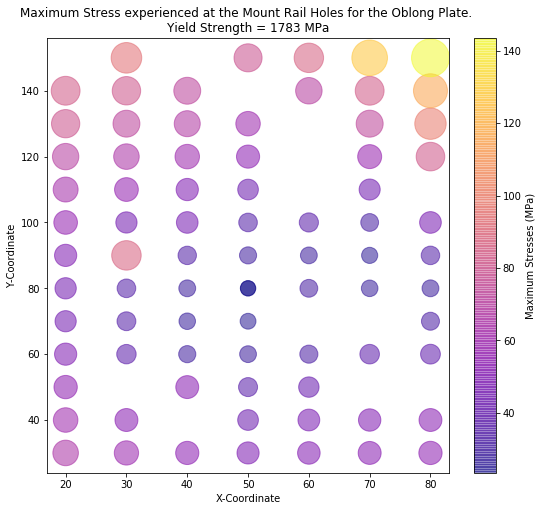

In [7]:
fig = plt.figure(figsize=(9,8))
plt.scatter(x=df['HoleXDist'],y=df['HoleZDist'],s=df['Stress1']*10,c=df['Stress1'],cmap="plasma",alpha=0.5)
plt.xlabel("X-Coordinate")
plt.ylabel("Y-Coordinate")
plt.title("Maximum Stress experienced at the Mount Rail Holes for the Oblong Plate. \nYield Strength = 1783 MPa")
plt.colorbar(label="Maximum Stresses (MPa)")
plt.clim(df['Stress1'].min(),df['Stress1'].max())
plt.show()

In [8]:
fig.savefig("Figures/F1/HolePlacement.png")

In [9]:
df[(df['Stress1']<=30.0) ] #& ((df['HoleZDist']<70) | (df['HoleZDist']>100))]

,HoleZDist,HoleXDist,XCoOrdCheck,ResDisplacement,ZCoOrdCheck,Stress1
1,80,50,70.0,0.05703,80.0,23.417
31,60,40,60.0,0.04483,60.0,29.441
32,70,40,60.0,0.05478,70.0,27.262
33,80,40,60.0,0.06592,80.0,28.396
44,60,50,70.0,0.04496,60.0,28.173
45,70,50,70.0,0.04444,70.0,25.087
46,80,50,70.0,0.05703,80.0,23.417
47,90,50,70.0,0.06873,90.0,29.283
60,90,60,80.0,0.06210,90.0,28.253
72,80,70,90.0,0.04204,80.0,27.479


In [10]:
df.head()

,HoleZDist,HoleXDist,XCoOrdCheck,ResDisplacement,ZCoOrdCheck,Stress1
1,80,50,70.0,0.05703,80.0,23.417
2,30,20,40.0,0.16144,30.0,65.434
3,40,20,40.0,0.11396,40.0,60.359
4,50,20,40.0,0.07569,50.0,54.498
5,60,20,40.0,0.08198,60.0,49.358


In [14]:
df['Stress1'].max()

143.52

## Figure 2: Hole Sizing and Distance Apart
CSV: RailHoleSizing

In [135]:
df.head()

,HoleSize,HoleSpacing,ResDisplacement,Stress1
5,1.6,10.0,0.04845,63.766
6,2.1,10.0,0.04626,47.451
7,2.6,10.0,0.04495,39.196
8,3.1,10.0,0.04468,31.504
9,3.6,10.0,0.04437,29.309


### Stress Curve

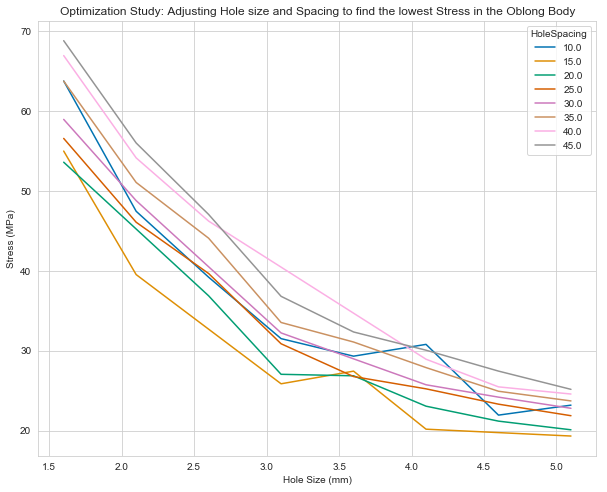

In [136]:
fig = plt.figure(figsize=(10,8))
sns.set_style("whitegrid")
sns.lineplot(x=df['HoleSize'],y=df['Stress1'],data=df,hue=df['HoleSpacing'],palette='colorblind')
plt.xlabel("Hole Size (mm)")
plt.ylabel("Stress (MPa)")
plt.title("Optimization Study: Adjusting Hole size and Spacing to find the lowest Stress in the Oblong Body")
plt.show()

#### Saving the Graph to an image

In [128]:
fig.savefig("Figures/F2/HoleStress4SizeSpace.png")

#### Evaluating Data Points

In [150]:
df[df['HoleSpacing']== 15]

,HoleSize,HoleSpacing,ResDisplacement,Stress1
13,1.6,15.0,0.04862,54.987
14,2.1,15.0,0.04634,39.524
16,3.1,15.0,0.04339,25.851
17,3.6,15.0,0.04230,27.434
18,4.1,15.0,0.04133,20.168
20,5.1,15.0,0.03963,19.310


### Displacement Curve

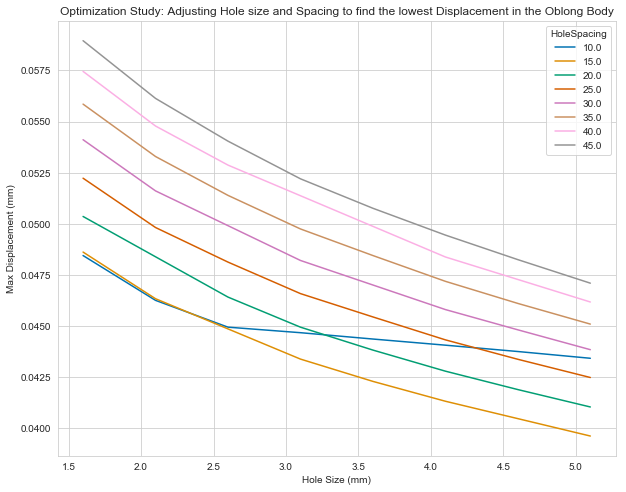

In [137]:
fig = plt.figure(figsize=(10,8))
sns.set_style("whitegrid")
sns.lineplot(x=df['HoleSize'],y=df['ResDisplacement'],data=df,hue=df['HoleSpacing'],palette='colorblind')
plt.xlabel("Hole Size (mm)")
plt.ylabel("Max Displacement (mm)")
plt.title("Optimization Study: Adjusting Hole size and Spacing to find the lowest Displacement in the Oblong Body")
plt.show()

#### Saving the graph to an Image

In [130]:
fig.savefig("Figures/F2/HoleDisp4SizeSpace")

#### Evaluating Data Points

In [140]:
df[df['HoleSpacing'] == 10]

,HoleSize,HoleSpacing,ResDisplacement,Stress1
5,1.6,10.0,0.04845,63.766
6,2.1,10.0,0.04626,47.451
7,2.6,10.0,0.04495,39.196
8,3.1,10.0,0.04468,31.504
9,3.6,10.0,0.04437,29.309
10,4.1,10.0,0.04407,30.786
11,4.6,10.0,0.04376,21.928
12,5.1,10.0,0.04343,23.176


## Figure 3: Carbon Fiber Boom Length and Diameter Analysis
#### Max Thrust: 20Kg
The total thrust is distributed accross the 6 motors resulting in roughly 3.34Kg of thrust per rotor boom.

*Note*:<br>
20Kg is assumed to be the maximum thrust that can be produced by the power chain and can only be achieved for a short duration of time, likely less than 20 seconds due to constrains on maximum power output from the motors.

Modeled Components for 20Kg thrust production:

|        Name        |      Properties     |      Links     |
|:------------------:|:-------------------:|:-------------------:|
| T-Motor MN4014     |        330kV        |        [Click](https://flyingrobot.co/collections/brushless-motors/products/tmotor-mn4014-330kv)        |
| CF Fixed Propeller | 17" x 6.5" |        [Click](https://flyingrobot.co/collections/7-or-bigger/products/ms1704)        |

In [23]:
df.head()

,TubeLength,TubeOD,Displacement1,Stress1
5,250.0,10.0,1.05703,124.42
6,275.0,10.0,1.45581,138.81
7,300.0,10.0,1.94392,153.12
8,325.0,10.0,2.53048,164.56
9,350.0,10.0,3.22465,178.73


### Stress Curve

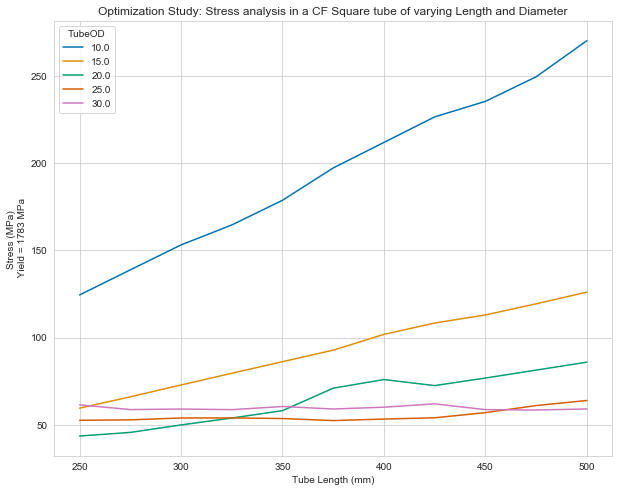

In [8]:
fig = plt.figure(figsize=(10,8))
sns.set_style("whitegrid")
sns.lineplot(x=df['TubeLength'],y=df['Stress1'],data=df,hue=df['TubeOD'],palette='colorblind')
plt.xlabel("Tube Length (mm)")
plt.ylabel("Stress (MPa) \n Yield = 1783 MPa")
plt.title("Optimization Study: Stress analysis in a CF Square tube of varying Length and Diameter")
plt.show()

#### Saving the graph to and Image

In [16]:
fig.savefig("Figures/F3/SquareCFStressAnalysis20kg.png")

#### Evaluating Data Points

In [15]:
df[((df['TubeOD'] == 25) | (df['TubeOD'] == 30) | (df['TubeOD'] == 20)) & (df['TubeLength'] == 325)]

,TubeLength,TubeOD,Displacement1,Stress1
30,325.0,20.0,0.28965,53.810
41,325.0,25.0,0.15292,53.864
52,325.0,30.0,0.09887,58.625


### Displacement Curve

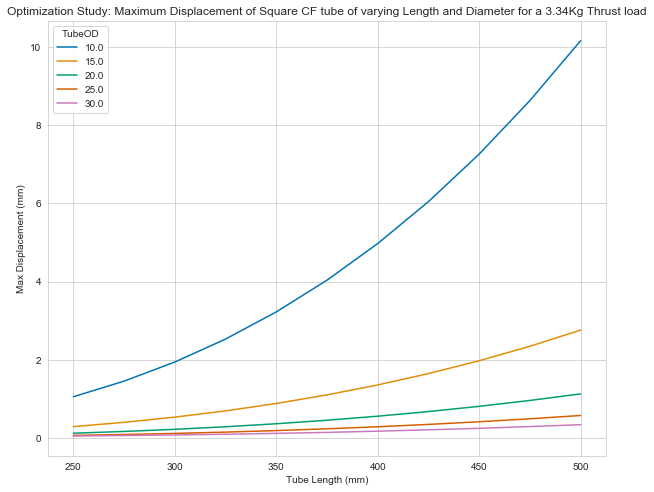

In [17]:
fig = plt.figure(figsize=(10,8))
sns.set_style("whitegrid")
sns.lineplot(x=df['TubeLength'],y=df['Displacement1'],data=df,hue=df['TubeOD'],palette='colorblind')
plt.xlabel("Tube Length (mm)")
plt.ylabel("Max Displacement (mm)")
plt.title("Optimization Study: Maximum Displacement of Square CF tube of varying Length and Diameter for a 3.34Kg Thrust load")
plt.show()

#### Saving the Graph to an Image

In [26]:
fig.savefig("Figures/F3/SquareCFDispAnalysis20kg2.png")

#### Evaluating Data Points

In [22]:
df[df['TubeOD']==20]

,TubeLength,TubeOD,Displacement1,Stress1
27,250.0,20.0,0.12479,43.489
28,275.0,20.0,0.16963,45.569
29,300.0,20.0,0.22424,49.855
30,325.0,20.0,0.28965,53.810
31,350.0,20.0,0.36671,58.040
32,375.0,20.0,0.45643,70.947
33,400.0,20.0,0.55985,75.886
34,425.0,20.0,0.67789,72.421
35,450.0,20.0,0.81151,76.762
36,475.0,20.0,0.96197,81.298


## Figure n

In [ ]:
df.head()

### %%Curve

#### Saving graph to an Image

In [ ]:
fig.savefig("Figures/Fn/xxx.png")

#### Evaluating Data Points